In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_excel("D:\myJupyter\ST-GK-Tensorflow\data_compare\compare(A).xlsx", parse_dates=True)
df.head()

,Time series,Ground Truth,T-GCN,Our Algorithm(Static),Our Algorithm(Dynamic),Our Algorithm(Static+Dynamic)
0,2023-08-11 02:30:00,0.128571,0.102745,0.210289,0.051543,0.065741
1,2023-08-11 03:00:00,0.150000,0.104307,0.212727,0.070371,0.086487
2,2023-08-11 03:30:00,0.171429,0.106591,0.213850,0.090127,0.107633
3,2023-08-11 04:00:00,0.192857,0.109555,0.215067,0.109769,0.127702
4,2023-08-11 04:30:00,0.214286,0.112085,0.218088,0.128606,0.148555


In [3]:
#without cut
start = pd.Timestamp('2023/8/11  2:30:00')
end = pd.Timestamp('2023/11/6  14:00:00')
df_temp = df[(df['Time series']>=start)&(df['Time series']<=end)][['Time series','Ground Truth','T-GCN','Our Algorithm(Static)','Our Algorithm(Dynamic)','Our Algorithm(Static+Dynamic)']]
df_temp.reset_index(drop=True, inplace=True)

In [4]:
df_temp['month'] = pd.DatetimeIndex(df_temp['Time series']).month
df_temp['year'] = pd.DatetimeIndex(df_temp['Time series']).year
df_temp['day'] = pd.DatetimeIndex(df_temp['Time series']).day
df_temp['month_year'] = [str(i)+'-'+str(j) for i,j in zip(df_temp.year, df_temp.month)]
df_temp['month_day'] = [str(i)+'-'+str(j) for i,j in zip(df_temp.month, df_temp.day)]
df_temp.head()

,Time series,Ground Truth,T-GCN,Our Algorithm(Static),Our Algorithm(Dynamic),Our Algorithm(Static+Dynamic),month,year,day,month_year,month_day
0,2023-08-11 02:30:00,0.128571,0.102745,0.210289,0.051543,0.065741,8,2023,11,2023-8,8-11
1,2023-08-11 03:00:00,0.150000,0.104307,0.212727,0.070371,0.086487,8,2023,11,2023-8,8-11
2,2023-08-11 03:30:00,0.171429,0.106591,0.213850,0.090127,0.107633,8,2023,11,2023-8,8-11
3,2023-08-11 04:00:00,0.192857,0.109555,0.215067,0.109769,0.127702,8,2023,11,2023-8,8-11
4,2023-08-11 04:30:00,0.214286,0.112085,0.218088,0.128606,0.148555,8,2023,11,2023-8,8-11


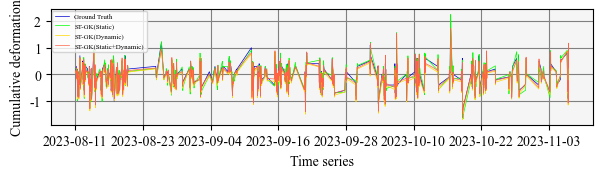

In [8]:
#all
# 设置西文字体为新罗马字体
from matplotlib import rcParams

config = {
    "font.family":'Times New Roman',  # 设置字体类型
    "axes.unicode_minus": False #解决负号无法显示的问题
}
rcParams.update(config)



plt.figure(figsize=(7,1.5))
ax = plt.axes().set_facecolor('whitesmoke')
# in plot method we set the label and color of the curve.
plt.plot(df_temp['Time series'], df_temp['Ground Truth'],  label = "Ground Truth", color='mediumblue', linewidth=0.5)
plt.plot(df_temp['Time series'], df_temp['Our Algorithm(Static)'], label = "ST-GK(Static)", color='lime', linewidth=0.5)
plt.plot(df_temp['Time series'], df_temp['Our Algorithm(Dynamic)'], label = "ST-GK(Dynamic)", color='gold', linewidth=0.5)
plt.plot(df_temp['Time series'], df_temp['Our Algorithm(Static+Dynamic)'], label = "ST-GK(Static+Dynamic)", color='tomato', linewidth=0.5)



plt.xticks(pd.date_range('2023/8/11  2:30:00','2023/11/6  14:00:00',freq='12d'))
plt.xticks(fontsize=10)

plt.yticks(range(-1, 3, 1))
plt.yticks(fontsize=10)                    # 设置坐标标签字体大小

plt.grid(c='gray')
plt.ylabel('Cumulative deformation', fontsize=10)
plt.xlabel('Time series', fontsize=10)
plt.rcParams.update({'font.size': 10})
# plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0.2, fontsize=8)
plt.legend(loc=2, borderaxespad=0.2, fontsize=5)
plt.savefig("compare(A) ALL", bbox_inches = 'tight',dpi=600)
# plt.savefig("test.svg", dpi=300,format="svg")
plt.show()


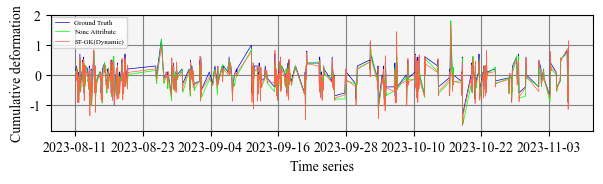

In [11]:
#without cut
# 设置西文字体为新罗马字体
from matplotlib import rcParams

config = {
    "font.family":'Times New Roman',  # 设置字体类型
    "axes.unicode_minus": False #解决负号无法显示的问题
}
rcParams.update(config)



plt.figure(figsize=(7,1.5))
ax = plt.axes().set_facecolor('whitesmoke')
# in plot method we set the label and color of the curve.
plt.plot(df_temp['Time series'], df_temp['Ground Truth'],  label = "Ground Truth", color='mediumblue', linewidth=0.5)
plt.plot(df_temp['Time series'], df_temp['T-GCN'], label = "None Attribute", color='lime', linewidth=0.5)
# plt.plot(df_temp['Time series'], df_temp['Our Algorithm(Static)'], label = "ST-GK(Static)", color='tomato', linewidth=0.5)
plt.plot(df_temp['Time series'], df_temp['Our Algorithm(Dynamic)'], label = "ST-GK(Dynamic)", color='tomato', linewidth=0.5)
# plt.plot(df_temp['Time series'], df_temp['Our Algorithm(Static+Dynamic)'], label = "ST-GK(Static+Dynamic)", color='tomato', linewidth=0.5)



plt.xticks(pd.date_range('2023/8/11  2:30:00','2023/11/6  14:00:00',freq='12d'))
plt.xticks(fontsize=10)

plt.yticks(range(-1, 3, 1))
plt.yticks(fontsize=10)                    # 设置坐标标签字体大小

plt.grid(c='gray')
plt.ylabel('Cumulative deformation', fontsize=10)
plt.xlabel('Time series', fontsize=10)
plt.rcParams.update({'font.size': 10})
# plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0.2, fontsize=8)
plt.legend(loc=2, borderaxespad=0.2, fontsize=5)
# plt.savefig("compare(A)None Attribute+Static", bbox_inches = 'tight', dpi=600)
plt.savefig("compare(A)None Attribute+Dynamic", bbox_inches = 'tight',dpi=600)
# plt.savefig("compare(A)None Attribute+Static+Dynamic", bbox_inches = 'tight',dpi=600)
# plt.savefig("test.svg", dpi=300,format="svg")
plt.show()
